In [1]:
import operator
from typing import Annotated, Any, Sequence
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class State(TypedDict):
    aggregate: Annotated[list, operator.add]
    which: str

In [4]:
from typing import Any


class ReturnNodeValue:
    def __init__(self, msg: str) -> None:
        self._value = msg

    def __call__(self, state: State) -> Any:
        print(f" I am going to save {self._value} to {state['aggregate']}")
        return {"aggregate": [self._value]}

In [5]:
a = ReturnNodeValue("I am A")
b = ReturnNodeValue("I am B")
c = ReturnNodeValue("I am C")
d = ReturnNodeValue("I am D")
e = ReturnNodeValue("I am E")


In [6]:
builder = StateGraph(State)
builder.add_node("a", a)
builder.add_node("b", b)
builder.add_node("c", c)
builder.add_node("d", d)
builder.add_node("e", e)

In [8]:
builder.add_edge(START, "a")

In [10]:
def route_bc_or_cd(state: State) -> Sequence[str]:
    if state["which"] == "cd":
        return ["c", "d"]
    return ["b", "c"]
    

In [9]:
intermediate = ["b", "c", "d"]

In [11]:
builder.add_conditional_edges(
    "a",
    route_bc_or_cd,
    intermediate,
)

In [12]:
for node in intermediate:
    builder.add_edge(node, "e")

In [13]:
builder.add_edge("e", END)

In [14]:
graph = builder.compile()

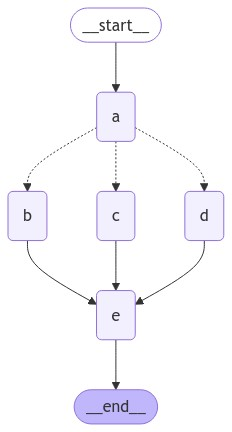

In [15]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"aggreage":[], "which": "bc"})

 I am going to save I am A to []
 I am going to save I am B to ['I am A']
 I am going to save I am C to ['I am A']
 I am going to save I am E to ['I am A', 'I am B', 'I am C']


{'aggregate': ['I am A', 'I am B', 'I am C', 'I am E'], 'which': 'bc'}

In [17]:
graph.invoke({"aggreage":[], "which": "cd"})

 I am going to save I am A to []
 I am going to save I am C to ['I am A']
 I am going to save I am D to ['I am A']
 I am going to save I am E to ['I am A', 'I am C', 'I am D']


{'aggregate': ['I am A', 'I am C', 'I am D', 'I am E'], 'which': 'cd'}